In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df=pd.read_csv("Advertising.csv",index_col=False)

In [54]:
# dropping the column by index values
df.drop(df.columns[[0]],inplace=True,axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


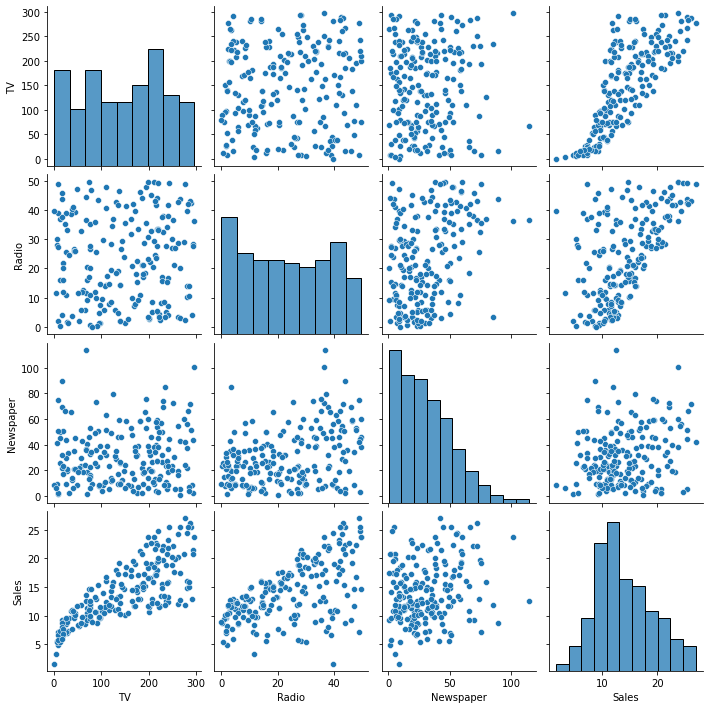

In [55]:
sns.pairplot(df)

In [56]:
X=df.drop("Sales",axis=1)

In [57]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [58]:
Y=df["Sales"]

In [59]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=42)

In [68]:
len(df)

200

In [69]:
len(X_train),len(X_test)

(140, 60)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
model=LinearRegression()

In [78]:
model.fit(X_train,Y_train)

LinearRegression()

In [87]:
x_predict=model.predict(X_test)

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
114    14.6
173    11.7
5       7.2
126     6.6
117     9.4
73     11.0
140    10.9
98     25.4
172     7.6
96     11.7
Name: Sales, dtype: float64

In [93]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [88]:
mean_absolute_error(Y_test,x_predict)

1.5116692224549084

In [89]:
mean_absolute_error(Y_test,x_predict)

1.5116692224549084

In [90]:
mean_squared_error(Y_test,x_predict)

3.79679723671522

In [91]:
np.sqrt(mean_squared_error(Y_test,x_predict))

1.9485372043446387

In [95]:
test_residuals=Y_test-x_predict

In [96]:
test_residuals

95     0.334604
15     1.211772
30    -0.151071
158   -3.589238
128    2.497680
115   -0.755569
69     1.103075
170    1.049715
174   -1.775471
45    -0.224495
66     0.485570
182    2.174572
165   -2.402060
78    -3.670260
186    0.843204
177   -0.304544
56    -3.415494
152    0.443807
82     1.004171
68     0.175264
124   -0.068218
16    -1.274690
148   -1.596389
93     0.664982
65     1.691393
60     2.488020
84     0.782405
67     1.593723
125    1.519234
132   -2.814120
9     -1.576049
18     1.330806
55     1.969910
75    -4.077706
150   -2.001136
104    0.624092
135   -2.662026
137   -0.138265
164    1.060612
76     2.518094
79     1.486676
197    0.395137
38    -0.070454
24     1.609186
122   -1.563884
195    2.375645
29     1.211062
19     0.506693
143    1.709755
86     0.338802
114   -1.118484
173    0.068431
5     -6.153607
126   -4.553147
117    3.063632
73     1.238420
140    1.480429
98     1.144835
172   -0.095191
96    -0.453176
Name: Sales, dtype: float64

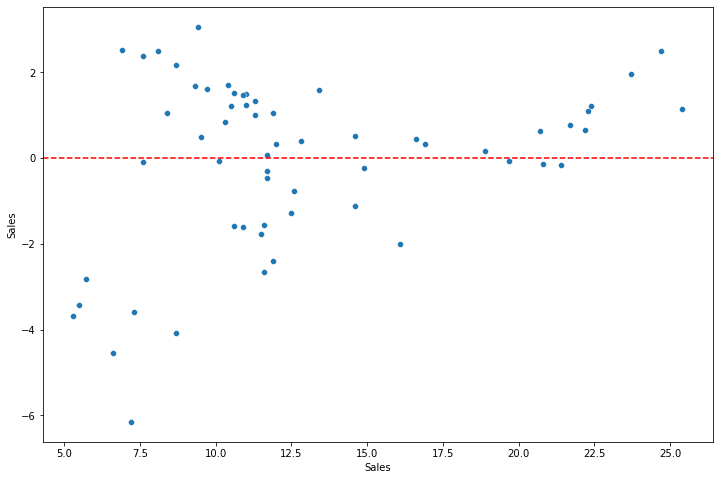

In [107]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=Y_test,y=test_residuals)
plt.axhline(y=0,color="red",ls="--")
# The plots are random and does not have any pattern of line or curve hence this dataset is valid for linear regression

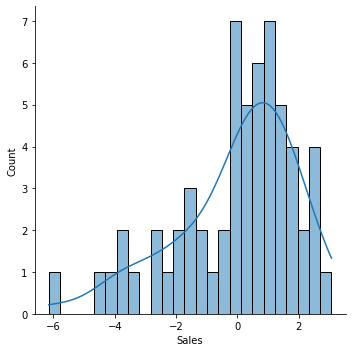

In [108]:
sns.displot(test_residuals,bins=25,kde=True)
# The distribution of residuals is normally distributed around zero and very close to mean this also proves
# This particular dataset is suitable for linear regression

In [109]:
import scipy as sp


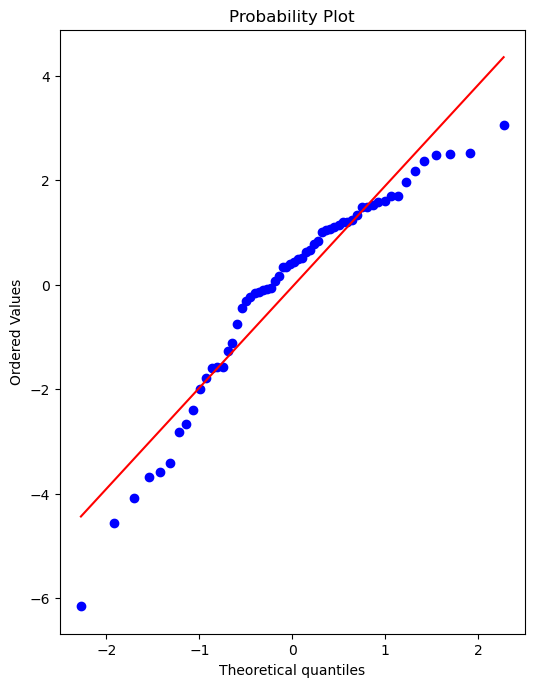

In [111]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)
_=sp.stats.probplot(test_residuals,plot=ax)

In [113]:
final_model=LinearRegression()

In [114]:
final_model.fit(X,Y)

LinearRegression()

In [115]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [116]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [117]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [118]:
y_hat=final_model.predict(X)

In [119]:
from joblib import dump,load

In [121]:
dump(final_model,"final_sales_model.joblib")

['final_sales_model.joblib']

In [122]:
loaded_model=load("final_sales_model.joblib")

In [124]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [125]:
# 149 TV Ads ,22 Radio , 12Newspaper
campaign=[[149,22,12]]

In [126]:
loaded_model.predict(campaign)

array([13.893032])

In [127]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [129]:
X=df.drop("Sales",axis=1)

In [130]:
Y=df["Sales"]

In [132]:
from sklearn.preprocessing import PolynomialFeatures

In [136]:
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

In [137]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [138]:
polynomial_converter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [141]:
poly_features=polynomial_converter.transform(X)

In [142]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [140]:
pd.DataFrame(polynomial_converter.transform(X))

,0,1,2,3,4,5,6,7,8
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56
...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,1459.24,141.34,527.16,13.69,51.06,190.44
196,94.2,4.9,8.1,8873.64,461.58,763.02,24.01,39.69,65.61
197,177.0,9.3,6.4,31329.00,1646.10,1132.80,86.49,59.52,40.96
198,283.6,42.0,66.2,80428.96,11911.20,18774.32,1764.00,2780.40,4382.44


In [144]:
X_train,X_test,Y_train,Y_test=train_test_split(poly_features,Y,test_size=.3,random_state=42)

In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
model1=LinearRegression()

In [147]:
model1.fit(X_train,Y_train)

LinearRegression()

In [149]:
x_predict=model1.predict(X_test)

In [150]:
model1.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [153]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [154]:
mean_squared_error(x_predict,Y_test)

0.52319449490554

In [155]:
mean_absolute_error(x_predict,Y_test)

0.5905974833808012

In [156]:
RMSE=np.sqrt(mean_squared_error(x_predict,Y_test))

In [157]:
RMSE

0.723321847385754

In [159]:
# 149 TV Ads ,22 Radio , 12Newspaper
campaign=polynomial_converter.transform([[149,22,12]])
model1.predict(campaign)

array([14.39756539])

In [160]:
polynomial_test_residual=Y_test - x_predict

In [161]:
polynomial_test_residual

95    -0.322638
15    -0.364319
30     1.057597
158   -0.338231
128    0.269298
115   -0.026709
69    -0.475810
170    0.227427
174   -0.643459
45    -0.692958
66     1.796788
182    0.560293
165   -0.040503
78    -0.702394
186   -0.221563
177   -0.599989
56    -1.234986
152    0.005949
82     0.730334
68    -0.128970
124   -0.454265
16    -1.436888
148    1.407293
93     0.109930
65     0.482734
60     0.461686
84    -0.668458
67     0.768948
125    0.478577
132   -0.329139
9     -1.069885
18     1.230397
55     0.215669
75    -1.159344
150    0.761302
104   -0.373328
135    0.632373
137    0.654453
164    0.155292
76     0.476849
79     0.285498
197   -0.034290
38     0.910400
24     0.786822
122   -0.271610
195    0.623731
29     0.542866
19    -0.096208
143    0.294179
86     0.744929
114    0.558026
173   -0.442984
5     -1.764119
126   -0.944292
117    1.002603
73     0.131454
140    1.005287
98     0.166263
172    0.801230
96    -0.262032
Name: Sales, dtype: float64

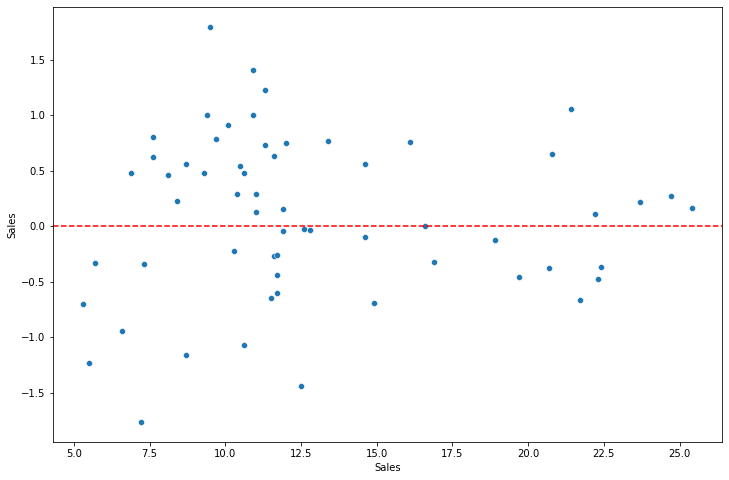

In [162]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=Y_test,y=polynomial_test_residual)
plt.axhline(y=0,color="red",ls="--")

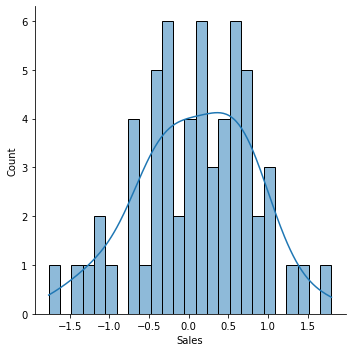

In [163]:
sns.displot(polynomial_test_residual,bins=25,kde=True)

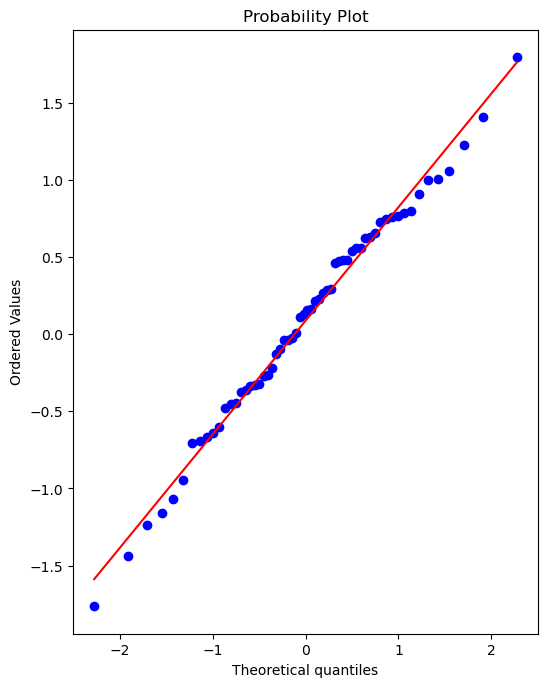

In [164]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)
_=sp.stats.probplot(polynomial_test_residual,plot=ax)

## Error against degree of complexity

In [166]:
# Create different order polynomial
# split polynomial data
# fit the train
# store the RMSE for both train and test set
# PLOT the results(error vs poly order)

In [193]:
train_rmse_errors=[]
test_rmse_errors=[]

for d in range(1,10):
    
    polynomial_converter=PolynomialFeatures(degree=d,include_bias=False)
    poly_features=polynomial_converter.fit(X)
#     print(d)
    X_train,X_test,Y_train,Y_test=train_test_split(polynomial_converter.transform(X),Y,test_size=.3,random_state=42)
    model=LinearRegression()
    model.fit(X_train,Y_train)
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    train_rmse=np.sqrt(mean_squared_error(train_pred,Y_train))
    test_rmse=np.sqrt(mean_squared_error(test_pred,Y_test))    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    
train_rmse_errors,test_rmse_errors

([1.574596830590544,
  0.5950712355838924,
  0.46887581118220883,
  0.3694689701771604,
  0.24382207780011816,
  0.1964896269557196,
  0.42462816629254896,
  0.15743428553968092,
  0.1655901933638644],
 [1.9485372043446385,
  0.723321847385754,
  0.5392350985593082,
  1.3032266106945223,
  5.9465072339228024,
  25.965475876591615,
  634.4705455929106,
  2697.7659217919527,
  132859.53269304626])

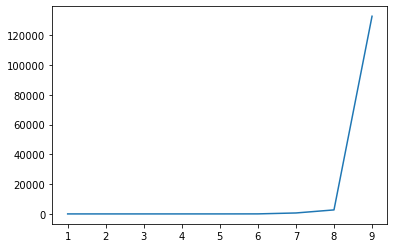

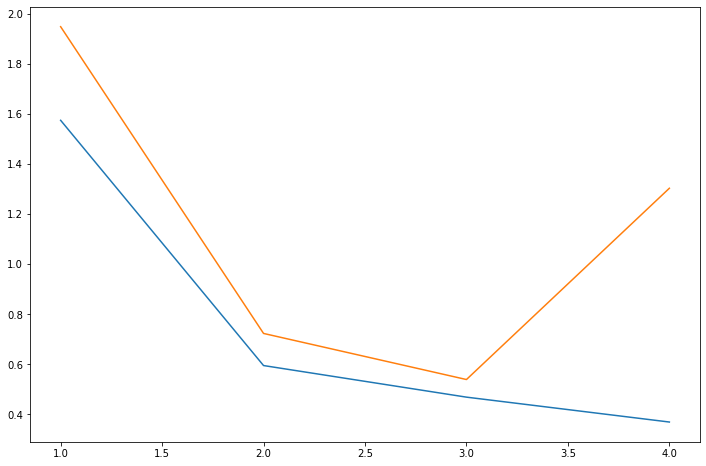

In [208]:
plt.figure(figsize=(12,8))

plt.plot(range(1,5),train_rmse_errors[:4],label="Train RMSE")
plt.plot(range(1,5),test_rmse_errors[:4],label="Test RMSE")
# This is the correct way to choose polynomial degree

In [209]:
final_polynomial_converter=PolynomialFeatures(degree=3,include_bias=False)


In [210]:
final_model=LinearRegression()

In [212]:
full_converted_X=final_polynomial_converter.fit_transform(X)
final_model.fit(full_converted_X,Y)

LinearRegression()

In [213]:
from joblib import dump,load

In [214]:
dump(final_model,"final_poly_model.joblib")

['final_poly_model.joblib']

In [215]:
dump(final_polynomial_converter,"final_poly_converter.joblib")

['final_poly_converter.joblib']

In [216]:
loaded_converter=load("final_poly_converter.joblib")

In [217]:
loaded_model=load("final_poly_model.joblib")

In [ ]:
campaign=